<a href="https://colab.research.google.com/github/AlbertoTavares13/WordCloud/blob/main/Analise_base_reclamac%CC%A7o%CC%83esvf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processamento Inicial

### Importa bibliotecas

In [357]:
import nltk
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

%matplotlib inline

### Define o diretório de trabalho

In [358]:
#workdir_path = '/mnt/5bdd0b49-a2cd-495d-a27b-f4810abd97ca/home/osias/Projects/'+\
#'Processamento de linguagem natural/Trabalho BI 2019'
#os.chdir(workdir_path)

### Leitura da base de reclamações

In [359]:
pwd

'/content'

In [360]:
data = pd.read_csv('base reclamações (2).csv',encoding='windows-1252',sep =';')
# verificação visual das 5 primeiras linhas
data.tail()

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea
42302,Sudeste,SP,B2W COMPANHIA DIGITAL,AMERICANAS.COM/SUBMARINO/SHOPTIME/SOUBARATO,COMÉRCIO VAREJISTA DE OUTROS PRODUTOS NÃO ESPE...,Microcomputador / Produtos de Informática,Não entrega/demora na entrega do produto,Nao Informada
42303,Sudeste,SP,ADIDAS DO BRASIL LTDA,ADIDAS.COM.BR,COMÉRCIO ATACADISTA DE CALÇADOS,Vestuário ( Calçado / Roupa ),Não entrega/demora na entrega do produto,entre 31 a 40 anos
42304,Sudeste,SP,RN COMERCIO VAREJISTA S/A,RICARDOELETRO.COM.BR/INSINUANTE.COM/ELETROSHOP...,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,"Acessório Para Vestuário ( Bolsa, Cinto, Chapé...",Produto entregue diferente do pedido,entre 21 a 30 anos
42305,Sudeste,SP,DECOLAR.COM LTDA,AGÊNCIA DECOLAR,AGÊNCIAS DE VIAGENS,Agências e Operadoras de viagens (pacotes turí...,Recusa injustificada em prestar serviço,Nao Informada
42306,Sudeste,SP,ESAB ESCOLA SUPERIOR ABERTA DO BRASIL LTDA,NaN,EDUCAÇÃO SUPERIOR - GRADUAÇÃO E PÓS-GRADUAÇÃO,"Escola ( Pré, 1º, 2º Graus e Superior )",Serviço não fornecido (entrega/instalação/não ...,entre 31 a 40 anos


### Quantidade de linhas e de colunas do dataframe lido

In [361]:
data.shape

(42307, 8)

In [362]:
data.query('estado=="RJ"')

,Regiao,estado,empresa,subsidiaria,area,serviço,problema,faixa etarea


In [363]:
data.groupby("estado").size().sort_values(ascending=False)

estado
SP    8127
GO    7764
MS    4723
RN    4073
MT    3972
MG    3460
PI    2153
RO    2057
SC    1955
CE    1766
ES     828
TO     567
PA     341
PB     302
MA     126
RS      90
PE       3
dtype: int64

# Verificar as reclamações por estado

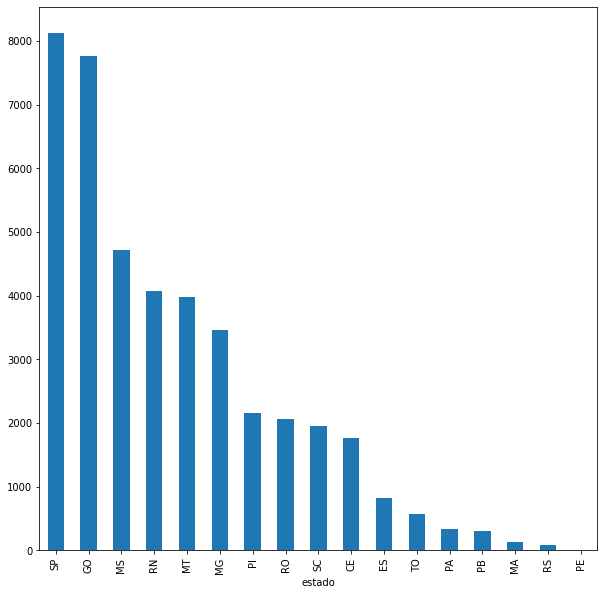

In [364]:
data.groupby("estado").size().sort_values(ascending=False)[:].plot(figsize=(10,10),kind='bar')

## Colunas da tabela

In [365]:
data.columns

Index(['Regiao ', 'estado', 'empresa', 'subsidiaria  ', 'area ', 'serviço',
       'problema', 'faixa etarea'],
      dtype='object')

In [366]:
new_columns = data.columns.values
new_columns[0] = 'Regiao' 
data.columns = new_columns

### Localização das colunas com valores "null"

In [367]:
data.isnull().sum()

Regiao              0
estado              0
empresa             1
subsidiaria      6530
area             5329
serviço             0
problema         8936
faixa etarea        0
dtype: int64

# Filtrar o Estado

In [368]:
df_seleciona_estado = pd.DataFrame()
df_seleciona_estado = data.query('estado == "SP" and Regiao =="Sudeste"')
#df_seleciona_estado = data.query('estado != "XX"')

In [369]:
data.count()


Regiao           42307
estado           42307
empresa          42306
subsidiaria      35777
area             36978
serviço          42307
problema         33371
faixa etarea     42307
dtype: int64

In [370]:
df_seleciona_estado.count()

Regiao           8127
estado           8127
empresa          8127
subsidiaria      6772
area             7275
serviço          8127
problema         7472
faixa etarea     8127
dtype: int64

# Tratamento das empresas

### Separação da coluna das empresas

In [371]:
df_seleciona_estado.count()

Regiao           8127
estado           8127
empresa          8127
subsidiaria      6772
area             7275
serviço          8127
problema         7472
faixa etarea     8127
dtype: int64

In [372]:
df_empresa = pd.DataFrame()
df_empresa['empresa'] = df_seleciona_estado['empresa']

In [373]:
df_empresa['empresa']

0                                        ITAÚ UNIBANCO S/A
1                                                CLARO S/A
2        ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO
3                                  GNN GARAGENS LTDA - EPP
4                                                CLARO S/A
                               ...                        
42302                                B2W COMPANHIA DIGITAL
42303                                ADIDAS DO BRASIL LTDA
42304                            RN COMERCIO VAREJISTA S/A
42305                                     DECOLAR.COM LTDA
42306           ESAB ESCOLA SUPERIOR ABERTA DO BRASIL LTDA
Name: empresa, Length: 8127, dtype: object

In [374]:
df_empresa['empresa'] = df_empresa['empresa'].apply(lambda x: x.replace(' S/A', ''))

In [375]:
df_empresa['empresa'] = df_empresa['empresa'].apply(lambda x: x.replace(' LTDA', ''))

In [376]:
df_empresa['empresa'] = df_empresa['empresa'].apply(lambda x: x.replace(' SA', ''))

In [377]:
df_empresa['empresa'] = df_empresa['empresa'].apply(lambda x: x.replace(' sa', ''))

In [378]:
df_empresa['empresa'] = df_empresa['empresa'].apply(lambda x: x.replace(' s/a', ''))

In [379]:
df_empresa['empresa'] = df_empresa['empresa'].apply(lambda x: x.replace(' CEF', ''))

In [380]:
df_empresa['empresa']

0                                            ITAÚ UNIBANCO
1                                                    CLARO
2        ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO
3                                       GNN GARAGENS - EPP
4                                                    CLARO
                               ...                        
42302                                B2W COMPANHIA DIGITAL
42303                                     ADIDAS DO BRASIL
42304                                RN COMERCIO VAREJISTA
42305                                          DECOLAR.COM
42306                ESAB ESCOLA SUPERIOR ABERTA DO BRASIL
Name: empresa, Length: 8127, dtype: object

### Verificação se há algum "null"

In [381]:
df_empresa.isnull().sum()

empresa    0
dtype: int64

### Remoção dos "nulls" encontrados

In [382]:
df_empresa.dropna(inplace=True)
df_empresa.isnull().sum()

empresa    0
dtype: int64

### Substitui:

#### " " por "_" (espaço)

#### "/" por "" 

#### "," por "" 

#### "(" por "" 

#### ")" por "" 

#### "-" por ""

#### "." por ""

#### "\t" por "" (tab)

### para o wordcloud funcionar

In [383]:
#dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
dicionario = {' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":''}
df_empresa["Nome Empresa Sem Espaço"] = df_empresa.replace({'empresa': dicionario},regex=True)

### Converte o nome das empresas para letras minúsculas

In [384]:
df_empresa["Nome Empresa Sem Espaço"] = df_empresa["Nome Empresa Sem Espaço"].str.lower()

### Apreciação inicial do que foi obtido

In [385]:
print (df_empresa.groupby("Nome Empresa Sem Espaço").size().sort_values(ascending=False))

Nome Empresa Sem Espaço
telefonica_brasil                                    810
claro                                                562
eletropaulo_metropolitana_eletricidade_de_s_paulo    480
tim_celular                                          329
sky_brasil_serviços                                  187
                                                    ... 
luxottica_brasil_produtos_oticos_esportivos            1
líderes_rhx_evolução_e_desenvolvimento_sp              1
m_b_c_express_servicos_de_courier                      1
m_c_da_silva_pereira_toldos_me                         1
2_mil_multimarcassp_comercio_de_veiculos               1
Length: 1977, dtype: int64


In [386]:
lista = pd.DataFrame()
lista = df_empresa.groupby("Nome Empresa Sem Espaço").size().sort_values(ascending=False)

In [387]:
type(lista)

pandas.core.series.Series

In [388]:
lista.to_csv('lista.csv')

### Criação de uma string única com todas as ocorrências dos nomes das empresas

In [389]:
string_empresas = " ".join([text for text in df_empresa["Nome Empresa Sem Espaço"]])

### Geração do wordcloud das 40 empresas mais reclamadas

In [390]:
Estado_mask = np.array(Image.open("/content/EstadoSP.jpeg"))

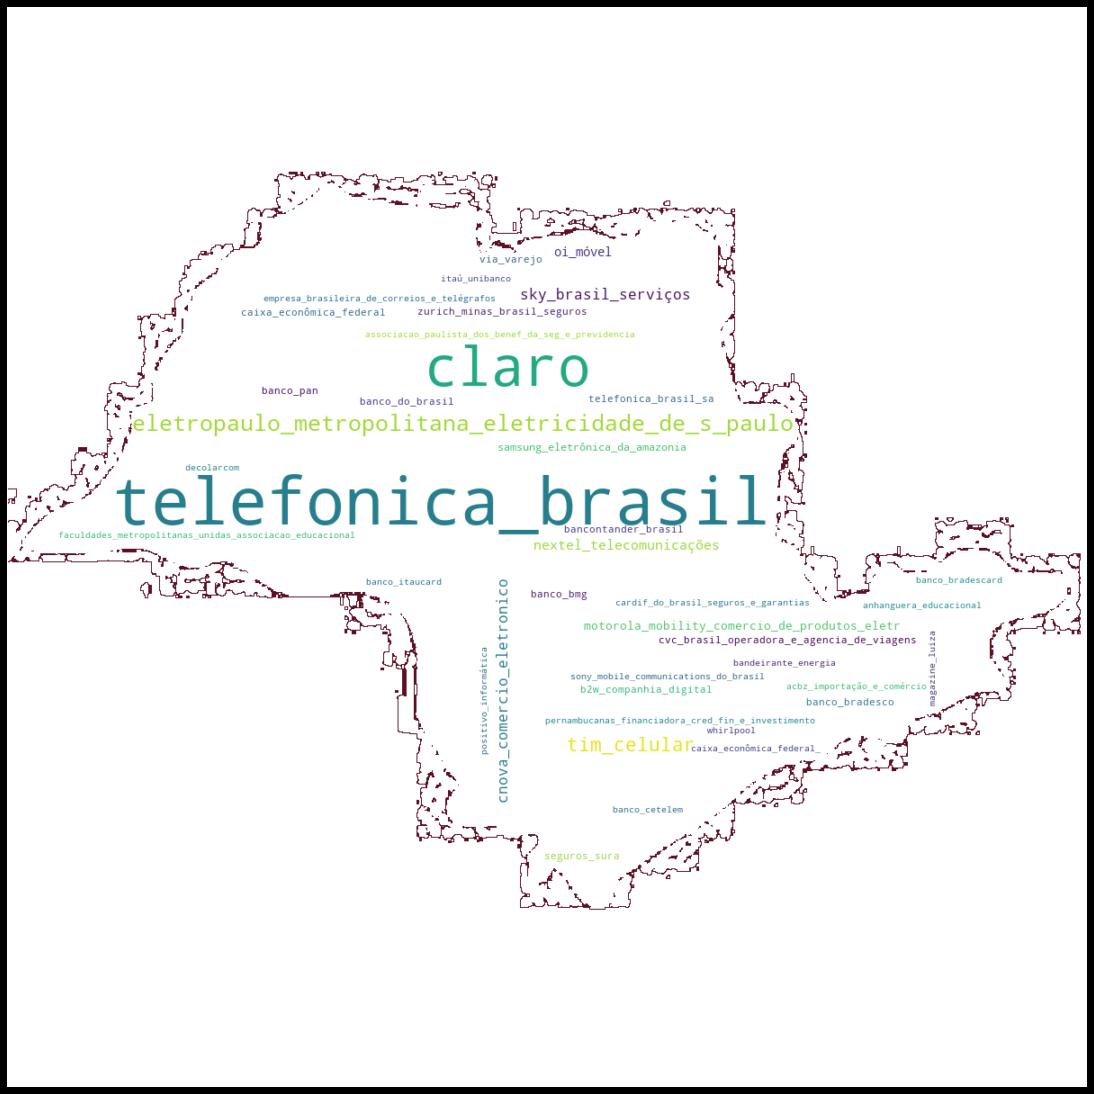

In [391]:
wordcloud_empresas = WordCloud(background_color="white",collocations=False,
                              #colormap="Oranges_r",
                       #       colormap="RdYlGn",
                              width = 4000,
                              height = 3000,
                              max_font_size=1000,
                              max_words=40
                               ,mask=Estado_mask
                             ,contour_color='#5d0f24',
                             contour_width=1
                              ).generate(string_empresas)
plt.figure(figsize = (20,15),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Empresa_wordcloud.png")
plt.show()

### Para ficar mais claro, é interessante um diagrama de barras ordenado pela quantidade decrescente de problemas, limitado aos 40 mais reclamados. 

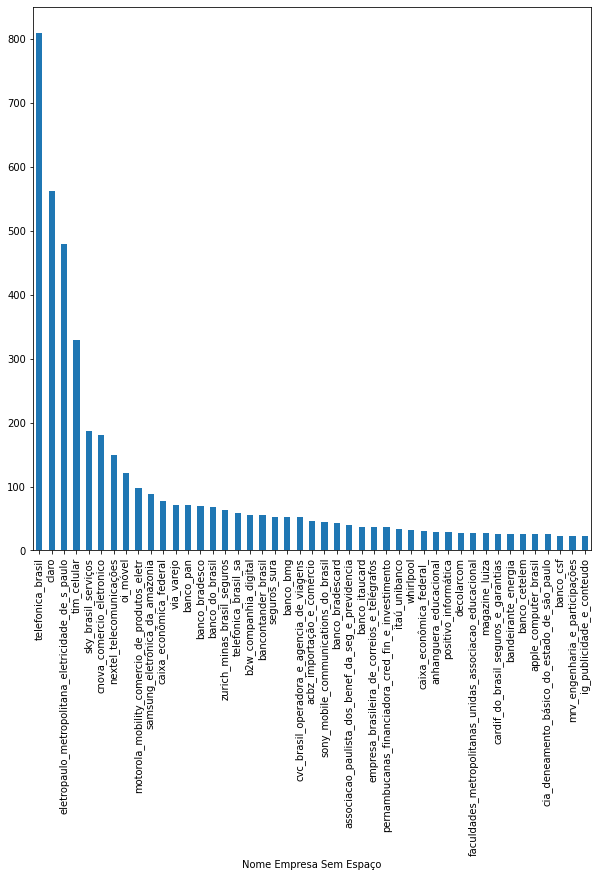

In [392]:
df_empresa.groupby("Nome Empresa Sem Espaço").size().sort_values(ascending=False)[:45].plot(figsize=(10,10),kind='bar')